**โดย ดร.ปกรณ์ ยุบลโกศล** <br> <br>

# Classification วัตถุว่าเป็น Rock (หิน) หรือ Mine (แร่) จากสัญญาณ sonar

สัญญาณ Sonar ถูกส่งออกไปให้กระทบกับวัตถุแล้วสะท้อนกับมาซึ่ง หลังจากประมวลผลทางสัญญาณแล้วได้ features ออกมา 60 ชนิด สำหรับใช้เพื่อบอกว่าวัตถุที่สัญญาณ sonar สะท้อนมาคือ Rock หรือ Mine  

![alt text](https://3.bp.blogspot.com/-X0ZL2hK7P_A/TrntHNaWZvI/AAAAAAAALh0/N-rv9PN4ids/s1600/GDC_TrailBlazer_300x_215.jpg)

**ขั้นตอนประกอบด้วย**
1. นำเข้าข้อมูล
2. แยก features และ label
3. แบ่งข้อมูลเป็น 2 ส่วนเพื่อ train และ test
4. train โมเดลด้วยข้อมูลที่แบ่งไว้
5. วัดประสิทธิภาพของโมเดล
6. นำโมเดลไปใช้กับข้อมูลใหม่


## 1) นำเข้าข้อมูล

In [1]:
import pandas as pd
#url = 'https://raw.githubusercontent.com/BU-MLearning/Summer/master/sonar.csv'
url = 'sonar.csv'
data = pd.read_csv(url)

สังเกตุหน้าตาข้อมูลที่ import เข้ามาว่าเป็นอย่างไรโดยใช้ `data.head()`

In [2]:
data.head(10)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,Rock
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,Rock
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,Rock
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,Rock
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,Rock


ดูค่าทางสถิติเบื้องต้นของข้อมูลที่ import เข้ามา

In [3]:
# describe data
from pandas import set_option

set_option('precision', 6)
data.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [4]:
# histograms
from matplotlib import pyplot

data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

<Figure size 1200x1200 with 64 Axes>

## 2) แยก features และ label

แยก features เก็บไว้ใน matrix ใหม่ชื่อ `X` <br>
แยก lable เก็บไว้ใน vector ใหม่ที่ชื่อ `y`

In [5]:
X = data.drop(['Class'], axis=1)
y = data[['Class']]

## 3) แบ่งข้อมูลเป็น 2 ส่วนเพื่อ train และ test

ใช้ `train_test_split` เพื่อแบ่งข้อมูลออกเป็น ข้อมูลสำหรับ train และสำหรับ test โดยในที่นี้ จะแบ่งข้อมูลไว้ 30% เพื่อทำการ test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

## 4) Train โมเดลด้วยข้อมูลที่แบ่งไว้

ใช้ decision tree เป็น classifier และทำการสร้าง instance จาก `DecisionTreeClassifier()` คลาส

In [7]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

หากต้องการใช้ classifier (algorithm) ตัวอื่นๆ ก็สามารถ import เข้ามาได้

In [8]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

In [9]:
#model = GaussianNB()
#model = KNeighborsClassifier()
#model.fit(X_train, y_train)

DecisionTreeClassifier()

ทำการ train โมเดล (หรือ fit) ด้วย `X_train` และ `y_train`

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 5) วัดความแม่นยำของโมเดล

ใช้ model ที่สร้างขึ้นทำการทำนาย label ของข้อมูลที่ถูกแบ่งไว้ทดสอบ (`X_test`)

In [11]:
y_predict = model.predict(X_test)

ใช้ `accuracy_score()` นับจำนวนค่าที่โมเดลทำนายถูกและผิด และคำนวนออกมาเป็นเปอร์เซ็นต์

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7619047619047619

ลอง `print` ค่าที่โมเดลทำนายได้ออกมาดู บางส่วน

In [13]:
y_predict
y_predict = pd.DataFrame(data=y_predict)
y_predict.head()

,0
0,Mine
1,Mine
2,Mine
3,Mine
4,Mine


ลอง `print` ค่าของ label จริงๆ ออกมาดูบางส่วนเพื่อเปรียบเทียบกับค่าที่ทำนายได้จากโมเดล

In [14]:
y_test.head()

,Class
131,Mine
175,Mine
185,Mine
136,Mine
111,Mine


In [ ]:
import pickle
# save the model to disk
filename = 'pickle_finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

## 6) การนำโมเดลไปใช้กับข้อมูลใหม่

ลองสมมติข้อมูลใหม่ขึ้นมา ในที่นี้คือ `5.2, 3.2, 1.1, 0.1`

In [15]:
d = X[106:108]

X_new = d
print(X_new)

     attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
106       0.0331       0.0423       0.0474       0.0818       0.0835   
107       0.0428       0.0555       0.0708       0.0618       0.1215   

     attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  \
106       0.0756       0.0374       0.0961       0.0548        0.0193   
107       0.1524       0.1543       0.0391       0.0610        0.0113   

         ...       attribute_51  attribute_52  attribute_53  attribute_54  \
106      ...             0.0133        0.0078        0.0174        0.0176   
107      ...             0.0009        0.0142        0.0179        0.0079   

     attribute_55  attribute_56  attribute_57  attribute_58  attribute_59  \
106        0.0038        0.0129        0.0066        0.0044        0.0134   
107        0.0060        0.0131        0.0089        0.0084        0.0113   

     attribute_60  
106        0.0092  
107        0.0049  

[2 rows x 60 columns]


ใส่ข้อมูลใหม่ให้โมเดลทำนาย และ `print` ผลการทำนายออกมาดู

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [16]:
y_new = model.predict(X_new)
print(y_new)
print(y[106:108])

['Mine' 'Mine']
    Class
106  Mine
107  Mine


## 7) ลองดู Tree ที่ได้จากการ train

In [17]:
from sklearn.tree.export import export_text
tree_rules = export_text(model, feature_names=list(X_train))
print(tree_rules)

|--- attribute_12 <= 0.23
|   |--- attribute_20 <= 0.83
|   |   |--- attribute_47 <= 0.25
|   |   |   |--- class: Rock
|   |   |--- attribute_47 >  0.25
|   |   |   |--- attribute_39 <= 0.78
|   |   |   |   |--- class: Mine
|   |   |   |--- attribute_39 >  0.78
|   |   |   |   |--- class: Rock
|   |--- attribute_20 >  0.83
|   |   |--- attribute_27 <= 0.88
|   |   |   |--- class: Mine
|   |   |--- attribute_27 >  0.88
|   |   |   |--- class: Rock
|--- attribute_12 >  0.23
|   |--- attribute_27 <= 0.79
|   |   |--- attribute_51 <= 0.01
|   |   |   |--- attribute_53 <= 0.02
|   |   |   |   |--- attribute_23 <= 0.87
|   |   |   |   |   |--- class: Rock
|   |   |   |   |--- attribute_23 >  0.87
|   |   |   |   |   |--- class: Mine
|   |   |   |--- attribute_53 >  0.02
|   |   |   |   |--- attribute_55 <= 0.00
|   |   |   |   |   |--- class: Rock
|   |   |   |   |--- attribute_55 >  0.00
|   |   |   |   |   |--- class: Mine
|   |   |--- attribute_51 >  0.01
|   |   |   |--- attribute_58 <= 

c:\users\george\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


## 8) ดู Confusion matrix

Confusion matrix, without normalization
[[31  7]
 [ 8 17]]


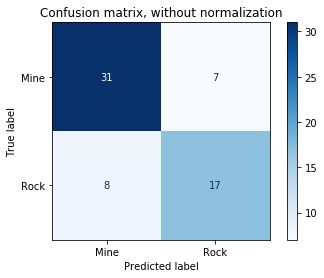

In [18]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()